In [1]:
import matplotlib.pyplot as mp
import sys
sys.path.insert(0, '/Volumes/Annie/CRRP/python/CRRP-photometry/')
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
import analysis_routines
import variables
import glob
import re
from astropy.stats import sigma_clip
import numpy.ma as ma
import statsmodels.api as sm
%matplotlib inline 

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Setup Directory Structure

In [23]:
target = 'OmegaCen2'
working_dir = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '13:26:47.28'
cluster_dec = '-47:28:46.1'
red_law = [1.0, 0.066, 0.051] 
Rv = 3.1


## Plot AOR footprint

In [24]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(working_dir+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(working_dir+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

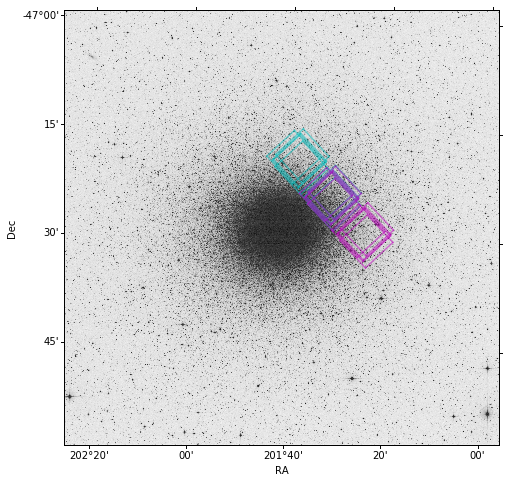

In [25]:
from matplotlib.colors import LogNorm
hdu = fits.open(working_dir+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
#mp.show()
mp.savefig(working_dir+target+'-map.pdf', format='pdf')

# ****Run pipeline